<a href="https://colab.research.google.com/github/79AceVo/Text-analytics/blob/main/Feature_Engineering_n_grams_tf_idf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bag of N-grams


We use sklearn CountVectorizer to create the Bag of Words

Documentation https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

We can use binary= True to see if the word appears or not, no need to count

### Uni-gram ==one word

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
documents = ["Dog bites man.", "Man bites dog.", "Dog eats meat.", "Man eats food."]
processed_docs = [doc.lower().replace(".","") for doc in documents]

In [ ]:
#Ngram vectorization example with count vectorizer and uni-gram first
count_vect3 = CountVectorizer(ngram_range=(1,1)) #set a range
# Build a BOW representation for the corpus
bow_rep3 = count_vect3.fit_transform(processed_docs)

#Look at the vocabulary mapping
print("Our vocabulary: ", count_vect3.vocabulary_)

#see the BOW rep for first 2 documents
print("BoW representation for" , processed_docs[0], ": ", bow_rep3[0].toarray())
print("BoW representation for" , processed_docs[1], ": ",bow_rep3[1].toarray())

#Get the representation using this vocabulary, for a new text
temp = count_vect3.transform(["dog and dog are friends"])

print("Bow representation for 'dog and dog are friends':", temp.toarray())

Our vocabulary:  {'dog': 1, 'bites': 0, 'man': 4, 'eats': 2, 'meat': 5, 'food': 3}
BoW representation for dog bites man :  [[1 1 0 0 1 0]]
BoW representation for man bites dog :  [[1 1 0 0 1 0]]
Bow representation for 'dog and dog are friends': [[0 2 0 0 0 0]]


### Bi-gram == two words

In [ ]:
#Ngram vectorization example with count vectorizer and uni-gram first
count_vect4 = CountVectorizer(ngram_range=(2,2)) #set a range
#Build a BOW representation for the corpus
bow_rep4 = count_vect4.fit_transform(processed_docs)

#Look at the vocabulary mapping
print("Our vocabulary: ", count_vect4.vocabulary_)

#see the BOW rep for first 2 documents
print("BoW representation for" , processed_docs[0], ": ", bow_rep4[0].toarray())
print("BoW representation for" , processed_docs[1], ": ",bow_rep4[1].toarray())

#Get the representation using this vocabulary, for a new text
temp = count_vect4.transform(["dog and dog are friends"])

print("Bow representation for 'dog and dog are friends':", temp.toarray())

Our vocabulary:  {'dog bites': 2, 'bites man': 1, 'man bites': 6, 'bites dog': 0, 'dog eats': 3, 'eats meat': 5, 'man eats': 7, 'eats food': 4}
BoW representation for dog bites man :  [[0 1 1 0 0 0 0 0]]
BoW representation for man bites dog :  [[1 0 0 0 0 0 1 0]]
Bow representation for 'dog and dog are friends': [[0 0 0 0 0 0 0 0]]


### tri-gram == three words

In [ ]:
#Ngram vectorization example with count vectorizer and uni-gram first
count_vect5 = CountVectorizer(ngram_range=(3,3)) #set a range
#Build a BOW representation for the corpus
bow_rep5 = count_vect5.fit_transform(processed_docs)

#Look at the vocabulary mapping
print("Our vocabulary: ", count_vect5.vocabulary_)
#see the BOW rep for first 2 documents
print("BoW representation for" , processed_docs[0], ": ", bow_rep5[0].toarray())
print("BoW representation for" , processed_docs[1], ": ",bow_rep5[1].toarray())

#Get the representation using this vocabulary, for a new text
temp = count_vect5.transform(["dog and dog are friends"])

print("Bow representation for 'dog and dog are friends':", temp.toarray())

Our vocabulary:  {'dog bites man': 0, 'man bites dog': 2, 'dog eats meat': 1, 'man eats food': 3}
BoW representation for dog bites man :  [[1 0 0 0]]
BoW representation for man bites dog :  [[0 0 1 0]]
Bow representation for 'dog and dog are friends': [[0 0 0 0]]


### Bag of N-grams
Let's have uni-gram. bi-gram, and tri-gram all together

In [ ]:
#Ngram vectorization example with count vectorizer and uni-gram first
count_vect5 = CountVectorizer(ngram_range=(1,3)) #set a range from 1 to 3 gram
#Build a BOW representation for the corpus
bow_rep5 = count_vect5.fit_transform(processed_docs)

#Look at the vocabulary mapping


print("Our vocabulary: ", {k: v for k, v in sorted(count_vect5.vocabulary_.items(), key=lambda item: item[1])})  #count_vect5.vocabulary_ is the dict, let's sort it

#see the BOW rep for first 2 documents
print("BoW representation for" , processed_docs[0], ": ", bow_rep5[0].toarray())
print("BoW representation for" , processed_docs[1], ": ",bow_rep5[1].toarray())

#Get the representation using this vocabulary, for a new text
temp = count_vect5.transform(["dog and dog are friends"])

print("Bow representation for 'dog and dog are friends':", temp.toarray())

Our vocabulary:  {'bites': 0, 'bites dog': 1, 'bites man': 2, 'dog': 3, 'dog bites': 4, 'dog bites man': 5, 'dog eats': 6, 'dog eats meat': 7, 'eats': 8, 'eats food': 9, 'eats meat': 10, 'food': 11, 'man': 12, 'man bites': 13, 'man bites dog': 14, 'man eats': 15, 'man eats food': 16, 'meat': 17}
BoW representation for dog bites man :  [[1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0]]
BoW representation for man bites dog :  [[1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0]]
Bow representation for 'dog and dog are friends': [[0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


# TF-IDF

YOu can flex your Python to calculate TF, IDF, then TF-IDF, but you don't have to. Sklearn have it covered

Documentation
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

L2 normalization is a way to make the vector smaller to save computing power but still retain enough information

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Tfidf vectorizer create transform the data into vector, and then create tf-idf for each document

tfidf = TfidfVectorizer() #norm =l2
bow_rep_tfidf = tfidf.fit_transform(processed_docs)


In [ ]:
bow_rep_tfidf.todense()

matrix([[0.65782931, 0.53256952, 0.        , 0.        , 0.53256952,
         0.        ],
        [0.65782931, 0.53256952, 0.        , 0.        , 0.53256952,
         0.        ],
        [0.        , 0.44809973, 0.55349232, 0.        , 0.        ,
         0.70203482],
        [0.        , 0.        , 0.55349232, 0.70203482, 0.44809973,
         0.        ]])

In [ ]:
processed_docs

['dog bites man', 'man bites dog', 'dog eats meat', 'man eats food']

In [ ]:
#get term frequency via Document Term Matrix. Row = Document. Column = Term. Matrix = Table
tf_dtm = tfidf.fit_transform(processed_docs).todense() #toarray returns an ndarray; todense returns a matrix.
tokens = tfidf.get_feature_names_out()
term_frequency = pd.DataFrame(data=tf_dtm,
                              columns=tokens)
print(term_frequency)

      bites      dog      eats      food      man      meat
0  0.657829  0.53257  0.000000  0.000000  0.53257  0.000000
1  0.657829  0.53257  0.000000  0.000000  0.53257  0.000000
2  0.000000  0.44810  0.553492  0.000000  0.00000  0.702035
3  0.000000  0.00000  0.553492  0.702035  0.44810  0.000000


In [ ]:
#IDF for all words in the vocabulary
print("IDF for all words in the vocabulary",tfidf.idf_)


IDF for all words in the vocabulary [1.51082562 1.22314355 1.51082562 1.91629073 1.22314355 1.91629073]


In [ ]:
tfidf.vocabulary_ #All words in the vocabulary.

{'dog': 1, 'bites': 0, 'man': 4, 'eats': 2, 'meat': 5, 'food': 3}

In [ ]:
#TFIDF representation for all documents in our corpus
for i in range(len(processed_docs)):
 print("document: ",processed_docs[i])
 print("has a TFIDF vector representation:",bow_rep_tfidf.toarray()[i])

#order is based on the get_feature names


document:  dog bites man
has a TFIDF vector representation: [0.65782931 0.53256952 0.         0.         0.53256952 0.        ]
document:  man bites dog
has a TFIDF vector representation: [0.65782931 0.53256952 0.         0.         0.53256952 0.        ]
document:  dog eats meat
has a TFIDF vector representation: [0.         0.44809973 0.55349232 0.         0.         0.70203482]
document:  man eats food
has a TFIDF vector representation: [0.         0.         0.55349232 0.70203482 0.44809973 0.        ]


In [ ]:
temp = tfidf.transform(["dog and man dog are friends."])
print("Tfidf representation for 'dog and man are friends':\n", temp.toarray())

Tfidf representation for 'dog and man are friends':
 [[0.         0.89442719 0.         0.         0.4472136  0.        ]]


## Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
corpus = ['The sun is the largest celestial body in the solar system',
          'The solar system consists of the sun and eight revolving planets',
          'Ra was the Egyptian Sun God',
          'The Pyramids were the pinnacle of Egyptian architecture',
          'The quick brown fox jumps over the lazy dog']

In [ ]:
tfidf2 = TfidfVectorizer()
tfidf2matrix = tfidf2.fit_transform(corpus)

tf_dtm2 = tfidf2.fit_transform(corpus).todense()
tokens2 = tfidf2.get_feature_names_out()
term_frequency2 = pd.DataFrame(data=tf_dtm2,
                              columns=tokens2)
term_frequency2 #TF-IDF of the matrix

,and,architecture,body,brown,celestial,consists,dog,egyptian,eight,fox,...,pyramids,quick,ra,revolving,solar,sun,system,the,was,were
0,0.000000,0.000000,0.337218,0.000000,0.337218,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.272065,0.225839,0.272065,0.482058,0.000000,0.000000
1,0.346907,0.000000,0.000000,0.000000,0.000000,0.346907,0.000000,0.000000,0.346907,0.000000,...,0.000000,0.000000,0.000000,0.346907,0.279882,0.232328,0.279882,0.330606,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.387878,0.000000,0.000000,...,0.000000,0.000000,0.480764,0.000000,0.000000,0.321974,0.000000,0.229087,0.480764,0.000000
3,0.000000,0.401284,0.000000,0.000000,0.000000,0.000000,0.000000,0.323754,0.000000,0.000000,...,0.401284,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.382428,0.000000,0.401284
4,0.000000,0.000000,0.000000,0.355599,0.000000,0.000000,0.355599,0.000000,0.000000,0.355599,...,0.000000,0.355599,0.000000,0.000000,0.000000,0.000000,0.000000,0.338890,0.000000,0.000000


In [ ]:
# compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf2matrix, tfidf2matrix) #compare each doc with the entire corpus.
print(cosine_sim)

[[1.         0.36413198 0.18314713 0.18435251 0.16336438]
 [0.36413198 1.         0.15054075 0.21704584 0.11203887]
 [0.18314713 0.15054075 1.         0.21318602 0.07763512]
 [0.18435251 0.21704584 0.21318602 1.         0.12960089]
 [0.16336438 0.11203887 0.07763512 0.12960089 1.        ]]


In [ ]:
pd.DataFrame(data =cosine_sim, columns = corpus, index = corpus) #add corpus to review similarity

,The sun is the largest celestial body in the solar system,The solar system consists of the sun and eight revolving planets,Ra was the Egyptian Sun God,The Pyramids were the pinnacle of Egyptian architecture,The quick brown fox jumps over the lazy dog
The sun is the largest celestial body in the solar system,1.000000,0.364132,0.183147,0.184353,0.163364
The solar system consists of the sun and eight revolving planets,0.364132,1.000000,0.150541,0.217046,0.112039
Ra was the Egyptian Sun God,0.183147,0.150541,1.000000,0.213186,0.077635
The Pyramids were the pinnacle of Egyptian architecture,0.184353,0.217046,0.213186,1.000000,0.129601
The quick brown fox jumps over the lazy dog,0.163364,0.112039,0.077635,0.129601,1.000000


In [ ]:
for i in range(len(cosine_sim)):
  print( corpus[i] ," with a cosine similarity score",cosine_sim[i].mean(), " of the corpus") #average similarity

The sun is the largest celestial body in the solar system  with a cosine similarity score  0.37899920077372284  of the corpus
The solar system consists of the sun and eight revolving planets  with a cosine similarity score  0.36875148864934953  of the corpus
Ra was the Egyptian Sun God  with a cosine similarity score  0.32490180416575665  of the corpus
The Pyramids were the pinnacle of Egyptian architecture  with a cosine similarity score  0.34883705183556357  of the corpus
The quick brown fox jumps over the lazy dog  with a cosine similarity score  0.29652785237971474  of the corpus


## going back to the original corpus
documents = ["Dog bites man.", "Man bites dog.", "Dog eats meat.", "Man eats food."]

In [ ]:
temp = tfidf.transform(["dog and man are friends."])
cosine_sim1 = cosine_similarity(temp, bow_rep_tfidf.toarray()) #how similar the "dog and man are friends." with the corpus

In [ ]:
pd.DataFrame(data =cosine_sim1, columns = processed_docs, index = ["dog and man are friends."]) #add corpus to review similarity

,dog bites man,man bites dog,dog eats meat,man eats food
dog and man are friends.,0.753167,0.753167,0.316854,0.316854


In [ ]:
temp2 = tfidf.transform(["dog eats man"])
similar2 = cosine_similarity(temp2, bow_rep_tfidf.toarray()) #how similar the "dog eats man" with the corpus
print(similar2)
print(similar2.mean())

[[0.56726059 0.56726059 0.60274773 0.60274773]]
0.5850041623121691


In [ ]:
pd.DataFrame(data =similar2, columns = processed_docs, index = ["dog eats man"]) #add corpus to review similarity

,dog bites man,man bites dog,dog eats meat,man eats food
dog eats man,0.567261,0.567261,0.602748,0.602748


In [ ]:
#if you want 1 number then just do avg
cosine_similarity(temp, bow_rep_tfidf.toarray()).mean()

0.5350107008146793

# TF-IDF Example - News similarity

In [ ]:
# download the BBC news blob (zip files)
#the files contain 5 folders, each folder is a news category. Each news are in a text format

!gdown 1eT3uD2ihxDEt2r2GJE6HeB_uhkgzh75V

#if gdown doesn't work, go to Brightspace and upload bbc.zip

Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1eT3uD2ihxDEt2r2GJE6HeB_uhkgzh75V

but Gdown can't. Please check connections and permissions.


In [ ]:
import zipfile
from pathlib import Path

In [ ]:
#unzip file and put in a df with three columns: topic, heading, body
with zipfile.ZipFile('/content/bbc.zip', 'r') as zip_ref:
    topic = []
    heading = []
    body =[]
    for filename in zip_ref.namelist():
        if filename.endswith('.txt'):
            with zip_ref.open(filename) as f:
                text = f.read()
                text = text.decode("latin1").split("\n")
                indiv_heading = text[0]
                heading.append(indiv_heading)
                indiv_body = ' '.join([l.strip() for l in text[1:]]).strip()
                body.append(indiv_body)
                topic.append(Path(filename).parent.name)

news_df = pd.DataFrame({'topic': topic,'heading':heading,'body':body})
news_df.head()

,topic,heading,body
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarner...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against t...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuko...
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices fo...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Domec...


In [ ]:
news_df.sample(10) #random inspect 10 samples

,topic,heading,body
2012,tech,Screensaver tackles spam websites,Net users are getting the chance to fight back...
2090,tech,The year search became personal,The odds are that when you fire up your browse...
830,entertainment,UK 'world's biggest music buyer',UK consumers are the biggest music buyers in t...
1659,sport,Moore questions captaincy,Brian Moore believes the England captain shoul...
1699,sport,Lions blow to World Cup winners,British and Irish Lions coach Clive Woodward s...
237,business,Firms pump billions into pensions,Employers have spent billions of pounds proppi...
1813,sport,Ivanovic seals Canberra victory,Serbia's Ana Ivanovic captured her first WTA t...
1486,sport,Cudicini misses Carling Cup final,Chelsea goalkeeper Carlo Cudicini will miss Su...
1982,tech,Freeze on anti-spam campaign,A campaign by Lycos Europe to target spam-rela...
197,business,Cairn shares up on new oil find,Shares in Cairn Energy have jumped 6% after th...


In [ ]:
#percent of news in each topic
news_df.topic.value_counts(normalize=True).to_frame('count').style.format({'count': '{:,.2%}'.format})


,count
sport,22.97%
business,22.92%
politics,18.74%
tech,18.02%
entertainment,17.35%


In [ ]:
len(news_df) #how many documents

2225

In [ ]:
#now create a tfidf for the news

tfidf = TfidfVectorizer(stop_words='english') #vectorize and elmininate english stop words
dtm_tfidf = tfidf.fit_transform(news_df.body)
tokens = tfidf.get_feature_names_out()
dtm_tfidf.shape #2225 docs with 28,980 terms!

(2225, 28980)

In [ ]:
dtm_tfidf.sum(axis=0)

matrix([[ 0.30312836, 21.00030792,  0.06511574, ...,  0.12162892,
          0.30869429,  0.2497171 ]])

In [ ]:
dtm_tfidf.sum(axis=0).A1

array([ 0.30312836, 21.00030792,  0.06511574, ...,  0.12162892,
        0.30869429,  0.2497171 ])

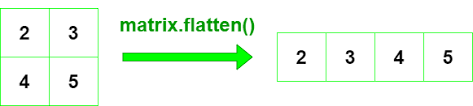

In [ ]:
#add all tokens in a new DF with its associated tfidf score
#sort the toke by its tf-idf score
token_freq = (pd.DataFrame({'tfidf': dtm_tfidf.sum(axis=0).A1 #A1 to flatten the matrix to array
                            ,
                            'token': tokens})
              .sort_values('tfidf', ascending=False))

In [ ]:
token_freq

,tfidf,token
22743,87.251494,said
17635,58.220783,mr
28821,41.982178,year
19471,37.303707,people
18044,34.197388,new
...,...,...
23933,0.014186,sioux
3381,0.014186,bane
3883,0.014186,biassed
8973,0.014186,duetted


# TD-IDF is a summarizer

In [ ]:
article = news_df.sample(1).squeeze() #select 1 random article squeeze() to create  series
article_id = article.name

In [ ]:
#print topic, heading, and body
print(article.topic.capitalize())
print()
print(article.heading)
print()
print(article.body)

Sport

Robinson out of Six Nations

England captain Jason Robinson will miss the rest of the Six Nations because of injury.  Robinson, stand-in captain in the absence of Jonny Wilkinson, had been due to lead England in their final two games against Italy and Scotland. But the Sale full-back pulled out of the squad on Wednesday because of a torn ligament in his right thumb. The 30-year-old will undergo an operation on Friday but England have yet to name a replacement skipper.  Robinson said: "This is very disappointing for me as this means I miss England's last two games in the Six Nations at Twickenham and two games for my club, Sale Sharks. "But I'm looking to be back playing very early in April."  Robinson picked up the injury in the 19-13 defeat to Ireland at Lansdowne Road on Saturday. And coach Andy Robinson said: "I am hugely disappointed for Jason. "As England captain he has been an immense figure during the autumn internationals and the Six Nations, leading by example at all ti

In [ ]:
#Select most relevant tokens by tfidf value
article_tfidf = dtm_tfidf[article_id].todense().A1 #look at the article in the dtm and get the flattened matrix A1 = flatten
article_tokens = pd.Series(article_tfidf, index=tokens) #create the token series based on the article tfidf
article_tokens.sort_values(ascending=False).head(10)

robinson     0.408913
england      0.349609
captain      0.215672
dawson       0.213769
squad        0.209278
guscott      0.194427
injury       0.138914
wilkinson    0.137386
jonny        0.136258
skipper      0.135180
dtype: float64

In [ ]:
article_tokens.sort_values(ascending=False).head(10) #here are the top term for the summary

robinson     0.408913
england      0.349609
captain      0.215672
dawson       0.213769
squad        0.209278
guscott      0.194427
injury       0.138914
wilkinson    0.137386
jonny        0.136258
skipper      0.135180
dtype: float64

In [ ]:
article.body #are they similar?

'England captain Jason Robinson will miss the rest of the Six Nations because of injury.  Robinson, stand-in captain in the absence of Jonny Wilkinson, had been due to lead England in their final two games against Italy and Scotland. But the Sale full-back pulled out of the squad on Wednesday because of a torn ligament in his right thumb. The 30-year-old will undergo an operation on Friday but England have yet to name a replacement skipper.  Robinson said: "This is very disappointing for me as this means I miss England\'s last two games in the Six Nations at Twickenham and two games for my club, Sale Sharks. "But I\'m looking to be back playing very early in April."  Robinson picked up the injury in the 19-13 defeat to Ireland at Lansdowne Road on Saturday. And coach Andy Robinson said: "I am hugely disappointed for Jason. "As England captain he has been an immense figure during the autumn internationals and the Six Nations, leading by example at all times. I look forward to having him

In [ ]:
#what if we randomly select the token in the text?
pd.Series(article.body.split()).sample(10).tolist()


['the',
 'because',
 'Road',
 'figures',
 'Sale',
 'games',
 'as',
 'be',
 'due',
 'two']

# TF-IDF as a proessing tasks for further analysis.

## Classifying news articles with Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
y = pd.factorize(news_df.topic)[0] #Encode the variable as categorical variable, 0='business', 1='entertainment', 2='politics', 3='sport', 4='tech'. [0] is the array [1] is the index
X = news_df.body

#train test split based on y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
pd.Series(y).value_counts()/len(y)

3    0.229663
0    0.229213
2    0.187416
4    0.180225
1    0.173483
dtype: float64

In [ ]:
#create tfidf vectors
tfidf = TfidfVectorizer(stop_words='english')
X_train_dtm = tfidf.fit_transform(X_train)
X_test_dtm = tfidf.transform(X_test)


In [ ]:
nb = MultinomialNB() #train naives bayes classifier
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

In [ ]:
#evaluate results
accuracy_score(y_test, y_pred_class)


0.9766606822262118

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       128
           1       0.99      0.97      0.98        97
           2       0.94      0.99      0.96       104
           3       0.99      1.00      1.00       128
           4       0.98      0.95      0.96       100

    accuracy                           0.98       557
   macro avg       0.98      0.98      0.98       557
weighted avg       0.98      0.98      0.98       557



In [ ]:
#look at the confusion matrix
pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_pred_class))


,0,1,2,3,4
0,124,0,3,0,1
1,0,94,2,0,1
2,1,0,103,0,0
3,0,0,0,128,0
4,1,1,2,1,95


In [ ]:
#look at the confusion matrix with class names
pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_pred_class), index=pd.factorize(news_df.topic)[1],columns = pd.factorize(news_df.topic)[1] )

,business,entertainment,politics,sport,tech
business,124,0,3,0,1
entertainment,0,94,2,0,1
politics,1,0,103,0,0
sport,0,0,0,128,0
tech,1,1,2,1,95
